# Validation Point Data _ Hausaufgabe


In [4]:
# Import neede modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
###########################
# Function Definitions!! ##
##########################


def R2_determination(df_col_obs, df_col_model):
    """Calculating the R2 determination, requires that the oberseved values and modeled values are stored in a pandas. dataframe

    Args:
        df_col_obs ([pandas.core.series.Series]): Observed Values
        df_col_model ([pandas.core.series.Series]): Modeld Values

    Returns:
        [numpy.float]: R2 Determination for selected values]
    """
    observed_differ = df_col_obs.sub(df_col_obs.mean())
    modeld_differ = df_col_model.sub(df_col_model.mean())

    Denominator = observed_differ.mul(modeld_differ).sum()
    Devider = np.sqrt(observed_differ.pow(2).sum())*np.sqrt(modeld_differ.pow(2).sum())

    R2 = (Denominator/Devider)**2
    return R2

def NSE(df_col_obs, df_col_model):
    """Calculates the Nash Sutcliffe Model Efficiency, requires the to arguments to be pandas.core.series.Series
    Args:
        df_col_obs ([pandas.core.series.Series]): Observed Values
        df_col_model ([pandas.core.series.Series]): Modeld Values

    Returns:
        [nunpy.float]: Nash Sutfliffe Efficiency Coefficient
    """
    Denominator = df_col_obs.sub(df_col_model).pow(2).sum()
    Devider = df_col_obs.sub(df_col_model.mean()).pow(2).sum()
    NSE = 1-(Denominator/Devider)
    return NSE

def PBIAS(df_col_obs, df_col_model):
    """Calculates the Percept BIas (PBIAS) (obs-sim) requires the to arguments to be pandas.core.series.Series
    Args:
        df_col_obs ([pandas.core.series.Series]): Observed Values
        df_col_model ([pandas.core.series.Series]): Modeld Values

    Returns:
        [nunpy.float]: Percept Bias (PBIAS) subtracting obsved-simulated values
    """
    Denominator = df_col_obs.sub(df_col_model).sum()
    Devider = df_col_obs.sum()
    
    pbias = 100*Denominator/Devider
    return pbias

def IE(df_col_obs, df_col_model):
    """ Calculates the Index of Agreement 
        requires the to arguments to be pandas.core.series.Series
    Args:
        df_col_obs ([pandas.core.series.Series]): Observed Values
        df_col_model ([pandas.core.series.Series]): Modeld Values

    Returns:
        [nunpy.float]:  Index of Agreement
    """
    Denominator = df_col_model.sub(df_col_obs).pow(2).sum()
    dev_abs = abs(df_col_model.sub(df_col_obs.mean()))+abs(df_col_obs.sub(df_col_obs.mean()))
    Devider = dev_abs.pow(2).sum()
    IE = 1-(Denominator/Devider)
    return IE

def MAE(df_col_obs, df_col_model):
    """Calcualtes the Mean Absolut Error requires the to arguments to be pandas.core.series.Series
    Args:
        df_col_obs ([pandas.core.series.Series]): Observed Values
        df_col_model ([pandas.core.series.Series]): Modeld Values

    Returns:
        [nunpy.float]:  Mean Absolut Error
    """
    MAE = 1/len(df_col_obs)*df_col_obs.sub(df_col_model).abs().sum()
    return MAE

def RMSE(df_col_obs, df_col_model):
    """Calculates the Root Mean Square Error requires the to arguments to be pandas.core.series.Series
    Args:
        df_col_obs ([pandas.core.series.Series]): Observed Values
        df_col_model ([pandas.core.series.Series]): Modeld Values

    Returns:
        [nunpy.float]: Root Mean Spuare Error (RMSE)a
    """
    RMSE = 1/len(df_col_obs)*df_col_obs.sub(df_col_model).pow(2).sum()
    RMSE = np.sqrt(RMSE)
    return RMSE

In [6]:
# Merging obs_snowdepth.csv & point_AHC-1.csv 
# Using Pandas

snow_depth_observed_raw = "results/obs_snowdepth.csv"
point_a1_raw = "results/rofental/point_AHC-1.csv"
point_a3_raw = "results/rofental/point_AHC-3.csv"

point_a1_SCF12_raw = "results/rofental_SCF1,2/point_AHC-1.csv"
point_a3_SCF12_raw = "results/rofental_SCF1,2/point_AHC-3.csv"

point_a1_SCF14_raw = "results/rofental_SCF1,4/point_AHC-1.csv"
point_a3_SCF14_raw = "results/rofental_SCF1,4/point_AHC-3.csv"

print("Erstellen der Nötigen Data frames")
df_point_a = pd.read_csv(point_a1_raw, parse_dates=["time"], dayfirst=True)
df_point_a = df_point_a[["time","snow_depth"]]
df_point_a = df_point_a.rename(columns= {"snow_depth":"Snow depth AHC-1 Latschbloder [m] MODEL"})

df_point_b = pd.read_csv(point_a3_raw, parse_dates=["time"], dayfirst=True)
df_point_b = df_point_b[["time", "snow_depth"]]
df_point_b = df_point_b.rename(columns= {"snow_depth":"Snow depth AHC-3 Proviantdepot [m] MODEL"})

df_point_a_SCF12 = pd.read_csv(point_a1_SCF12_raw, parse_dates=["time"], dayfirst=True)
df_point_a_SCF12 = df_point_a_SCF12[["time","snow_depth"]]
df_point_a_SCF12 = df_point_a_SCF12.rename(columns= {"snow_depth":"Snow depth AHC-1 Latschbloder [m] MODEL SCF1.2"})

df_point_b_SCF12 = pd.read_csv(point_a3_SCF12_raw, parse_dates=["time"], dayfirst=True)
df_point_b_SCF12 = df_point_b_SCF12[["time", "snow_depth"]]
df_point_b_SCF12 = df_point_b_SCF12.rename(columns= {"snow_depth":"Snow depth AHC-3 Proviantdepot [m] MODEL SCF1.2"})

df_point_a_SCF14 = pd.read_csv(point_a1_SCF14_raw, parse_dates=["time"], dayfirst=True)
df_point_a_SCF14 = df_point_a_SCF14[["time","snow_depth"]]
df_point_a_SCF14 = df_point_a_SCF14.rename(columns= {"snow_depth":"Snow depth AHC-1 Latschbloder [m] MODEL SCF1.4"})

df_point_b_SCF14 = pd.read_csv(point_a3_SCF14_raw, parse_dates=["time"], dayfirst=True)
df_point_b_SCF14 = df_point_b_SCF14[["time", "snow_depth"]]
df_point_b_SCF14 = df_point_b_SCF14.rename(columns= {"snow_depth":"Snow depth AHC-3 Proviantdepot [m] MODEL SCF1.4"})

df_observed = pd.read_csv(snow_depth_observed_raw, parse_dates=["time"], dayfirst=True)
print("DONE!")

Erstellen der Nötigen Data frames
DONE!


In [7]:
#print(df_observed.head(5))
#print(df_point_a.head(5))

print("Zusammenführen von observierten Daten und modellierten Daten - Schneehöhe: ")

df_combined_data = pd.merge(df_point_a, df_observed, how="inner")
df_combined_data = pd.merge(df_combined_data, df_point_b, on="time")
df_combined_data = pd.merge(df_combined_data, df_point_a_SCF12, on="time")
df_combined_data = pd.merge(df_combined_data, df_point_b_SCF12, on="time")
df_combined_data = pd.merge(df_combined_data, df_point_a_SCF14, on="time")
df_combined_data = pd.merge(df_combined_data, df_point_b_SCF14, on="time")
#df_combined_no_NaN = df_combined_data.fillna(0)
df_combined_no_NaN = df_combined_data.dropna()

#df_combined_data.to_csv("Combined_Point_data.csv")

name_AHC1_snow_depth_obs = "Snow depth AHC-1 Latschbloder [m]"
name_AHC1_snow_depth_model = "Snow depth AHC-1 Latschbloder [m] MODEL"
name_AHC1_snow_depth_model_SCF12 = "Snow depth AHC-1 Latschbloder [m] MODEL SCF1.2"
name_AHC1_snow_depth_model_SCF14 = "Snow depth AHC-1 Latschbloder [m] MODEL SCF1.4"

name_AHC3_snow_depth_obs = "Snow depth AHC-3 Proviantdepot [m]"
name_AHC3_snow_depth_model= "Snow depth AHC-3 Proviantdepot [m] MODEL"
name_AHC3_snow_depth_model_SCF12 = "Snow depth AHC-3 Proviantdepot [m] MODEL SCF1.2"
name_AHC3_snow_depth_model_SCF14 = "Snow depth AHC-3 Proviantdepot [m] MODEL SCF1.4"


Zusammenführen von observierten Daten und modellierten Daten - Schneehöhe: 


In [8]:
#######################
# Defining Function to print the criterias and ploting the observed and modeled values
#######################


def valided_point_dif_criteria (point_criteria, data_frame, name_df_col_obs, name_df_col_model):  
    """prints the validation criteras: Determination R^2 Nash Sutcliffe Model Efficiency, Index of Agreement, Mean Absolut Error, Root Mean Square Error, Percept Bias and plots both values

    Args:
        point ([str]): Name of the respective Point
         df_col_obs ([pandas.core.series.Series]): Observed Values
        df_col_model ([pandas.core.series.Series]): Modeld Values
    """
    df_col_obs = data_frame[name_df_col_obs]
    df_col_model = data_frame[name_df_col_model]
    
    print(f"Validierung des Modells mit zeitlichem Verlauf für punkt {point_criteria} ")
    R2 = R2_determination(df_col_obs, df_col_model)
    print("Determination of R2: ", R2)
    _NSE = NSE(df_col_obs, df_col_model)
    print("Neash Sutcliffe Efficiency: ", _NSE )
    _IE = IE(df_col_obs, df_col_model) #Wahrscheinlich ein Fehler in der Funktionsdefinition
    print("Index of Agreement : ", _IE)
    _MAE = MAE(df_col_obs, df_col_model)
    print("Mean Absolut Error: ", _MAE)
    _RMSE = RMSE(df_col_obs, df_col_model)
    print("Root MEan Square Error: ", _RMSE)
    _PBIAS = PBIAS(df_col_obs, df_col_model)
    print("Percept Bias :", _PBIAS)
    with open(f"{name_df_col_model}.md", "w") as f:
        f.write(f"| Kennzahl | Wert | \n |---|---|\n")
        f.write(f"|Determination of R2:| {R2}|\n")
        f.write(f"|Neash Sutcliffe Efficiency:| {_NSE}|\n")
        f.write(f"|Index of Agreement :| {_IE}|\n")
        f.write(f"|Mean Absolut Error: | {_MAE}|\n")
        f.write(f"|Root MEan Square Error: | {_RMSE}|\n")
        f.write(f"|Percept Bias :| {_PBIAS}|\n")
    
    plotframe = data_frame[["time", name_df_col_obs, name_df_col_model]]
    plotframe.plot(x="time")
    plt.title(point_criteria)
    plt.xlabel("Datum")
    plt.savefig(f"{name_df_col_model}.svg",dpi=350)
    
    _save_fig_md = f'<img src="{name_df_col_model}.svg">'
    
    #with open(f"{name_df_col_model}.md", "w") as f:
    #    f.write(f"| Kennzahl | Wert | \n |---|---|\n")
    #    f.write(f"|Determination of R2:| {R2}|\n")
    #    f.write(f"|Neash Sutcliffe Efficiency:| {_NSE}|\n")
    #    f.write(f"|Index of Agreement :| {_IE}|\n")
    #    f.write(f"|Mean Absolut Error: | {_MAE}|\n")
    #    f.write(f"|Root MEan Square Error: | {_RMSE}|\n")
    #    f.write(f"|Percept Bias :| {_PBIAS}|\n")
    #    f.write(f"|Plot :| {_save_fig_md}|\n")



Validierung des Modells mit zeitlichem Verlauf für punkt Snow depth AHC-1 Latschbloder [m] 
Determination of R2:  0.7468110174611375
Neash Sutcliffe Efficiency:  -0.584540387818208
Index of Agreement :  0.3944128134391722
Mean Absolut Error:  0.6337846124217663
Root MEan Square Error:  0.8267069939221312
Percept Bias : -435.6529730952
Validierung des Modells mit zeitlichem Verlauf für punkt Snow depth AHC-1 Latschbloder [m]SCF1.2 correction 
Determination of R2:  0.7054893020488777
Neash Sutcliffe Efficiency:  -0.597586324461169
Index of Agreement :  0.3240414347108189
Mean Absolut Error:  0.8217563325116066
Root MEan Square Error:  1.061601203983497
Percept Bias : -565.2725910181568
Validierung des Modells mit zeitlichem Verlauf für punkt Snow depth AHC-1 Latschbloder [m]SCF1.4 correction 
Determination of R2:  0.6317577729837398
Neash Sutcliffe Efficiency:  -0.5708513556408557
Index of Agreement :  0.26583975788196446
Mean Absolut Error:  1.038826669244663
Root MEan Square Error:  1.

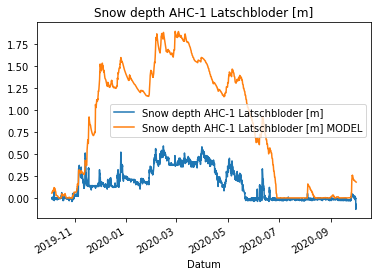

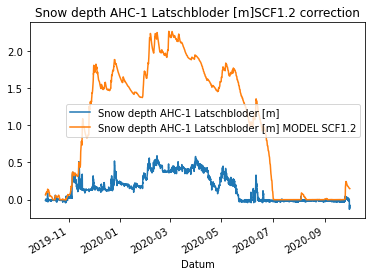

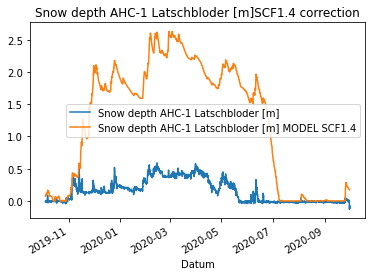

In [9]:
valided_point_dif_criteria(name_AHC1_snow_depth_obs, df_combined_no_NaN, name_AHC1_snow_depth_obs, name_AHC1_snow_depth_model)
valided_point_dif_criteria(name_AHC1_snow_depth_obs + "SCF1.2 correction", df_combined_no_NaN, name_AHC1_snow_depth_obs, name_AHC1_snow_depth_model_SCF12)
valided_point_dif_criteria(name_AHC1_snow_depth_obs + "SCF1.4 correction", df_combined_no_NaN, name_AHC1_snow_depth_obs, name_AHC1_snow_depth_model_SCF14)

Validierung des Modells mit zeitlichem Verlauf für punkt Snow depth AHC-3 Proviantdepot [m] 
Determination of R2:  0.9201734511481026
Neash Sutcliffe Efficiency:  0.7640090166716081
Index of Agreement :  0.9113802778897789
Mean Absolut Error:  0.21513256526285654
Root MEan Square Error:  0.31769184770630604
Percept Bias : 33.991547862558924
Validierung des Modells mit zeitlichem Verlauf für punkt Snow depth AHC-3 Proviantdepot [m]SCF1.2 correction 
Determination of R2:  0.9374866594209667
Neash Sutcliffe Efficiency:  0.8984990029351801
Index of Agreement :  0.9694114391391866
Mean Absolut Error:  0.12634119088518123
Root MEan Square Error:  0.20032874662229688
Percept Bias : 17.196716933124208
Validierung des Modells mit zeitlichem Verlauf für punkt Snow depth AHC-3 Proviantdepot [m]SCF1.4 correction 
Determination of R2:  0.9385647337063564
Neash Sutcliffe Efficiency:  0.9367666426714732
Index of Agreement :  0.9840763763267466
Mean Absolut Error:  0.09712293015219838
Root MEan Square

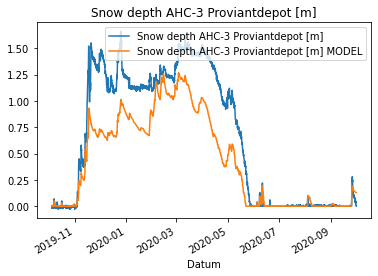

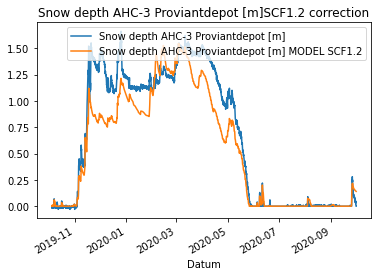

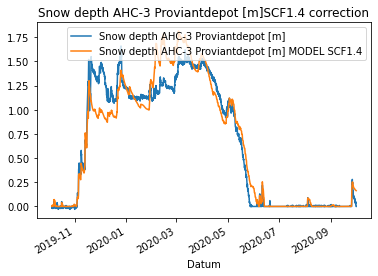

In [10]:
valided_point_dif_criteria(name_AHC3_snow_depth_obs, df_combined_no_NaN, name_AHC3_snow_depth_obs, name_AHC3_snow_depth_model)
valided_point_dif_criteria(name_AHC3_snow_depth_obs + "SCF1.2 correction", df_combined_no_NaN, name_AHC3_snow_depth_obs, name_AHC3_snow_depth_model_SCF12)
valided_point_dif_criteria(name_AHC3_snow_depth_obs + "SCF1.4 correction", df_combined_no_NaN, name_AHC3_snow_depth_obs, name_AHC3_snow_depth_model_SCF14)